## INIT

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install ogb torch-geometric sh dask[dataframe]

In [3]:
%cd "/content/gdrive/MyDrive/VINUNIVERSITY/Fall2024_Data_Mining/project"

/content/gdrive/MyDrive/VINUNIVERSITY/Fall2024_Data_Mining/project


In [4]:
import os
import numpy as np
import pandas as pd

import ogb
from ogb.linkproppred import PygLinkPropPredDataset
from ogb.nodeproppred import PygNodePropPredDataset

import torch
import torch_geometric.transforms as T

In [5]:
# !wget "http://snap.stanford.edu/ogb/data/graphproppred/ogbg_ppi_medium.zip"
# !wget "http://snap.stanford.edu/ogb/data/nodeproppred/proteins.zip"

In [6]:
# !unzip "proteins.zip"

In [7]:
# !wget "https://stringdb-static.org/download/protein.info.v11.0.txt.gz"

## 1. OGBL-PPA

In [ ]:
dataset = PygLinkPropPredDataset(
    name='ogbl-ppa',
    transform=T.ToSparseTensor()
)

ogbl-ppa has been updated.
Will you update the dataset now? (y/N)
Y


Downloaded 0.38 GB: 100%|██████████| 388/388 [00:17<00:00, 21.88it/s]


Extracting dataset/ppassoc.zip


Processing...


Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


Converting graphs into PyG objects...


100%|██████████| 1/1 [00:00<00:00, 522.52it/s]


Saving...


Done!
/usr/local/lib/python3.11/dist-packages/ogb/linkproppred/dataset_pyg.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.load(self.proc

In [ ]:
print("Number of classes: ", dataset.num_classes)
print("Data: ", dataset[0])
print("Split: ",dataset.get_idx_split())

print("Number of nodes:", dataset.num_nodes)
print("Number of edges:", dataset.edge_index.size(1))
print("Edge attributes shape:", dataset.edge_attr.size() if dataset.edge_attr is not None else "No edge attributes")
print("Node species shape:", dataset.node_species.size() if dataset.node_species is not None else "No node species")
print("Node labels shape:", dataset.y.size() if dataset.y is not None else "No node labels")

/usr/local/lib/python3.11/dist-packages/torch_geometric/utils/sparse.py:277: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  adj = torch.sparse_csr_tensor(


Number of classes:  0
Data:  Data(num_nodes=576289, x=[576289, 58], adj_t=[576289, 576289])


AttributeError: 'PygLinkPropPredDataset' object has no attribute 'get_idx_split'

## 2. OGBN-PROTEINS


In [8]:
dataset = PygNodePropPredDataset(
    name='ogbn-proteins',
    transform=T.ToSparseTensor(attr='edge_attr')
)

/usr/local/lib/python3.11/dist-packages/ogb/nodeproppred/dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.load(self.processed_

In [ ]:
print("Number of classes: ", dataset.num_classes)
print("Data: ", dataset[0])
print("Split: ",dataset.get_idx_split())

print("Number of nodes:", dataset.num_nodes)
print("Number of edges:", dataset.edge_index.size(1))
print("Edge attributes shape:", dataset.edge_attr.size() if dataset.edge_attr is not None else "No edge attributes")
print("Node species shape:", dataset.node_species.size() if dataset.node_species is not None else "No node species")
print("Node labels shape:", dataset.y.size() if dataset.y is not None else "No node labels")

Number of classes:  2
Data:  Data(num_nodes=132534, edge_index=[2, 79122504], edge_attr=[79122504, 8], node_species=[132534, 1], y=[132534, 112])
Split:  {'train': tensor([    0,     1,     2,  ..., 86616, 86617, 86618]), 'valid': tensor([ 86619,  86620,  86621,  ..., 107852, 107853, 107854]), 'test': tensor([107855, 107856, 107857,  ..., 132531, 132532, 132533])}
Number of nodes: 132534
Number of edges: 79122504
Edge attributes shape: torch.Size([79122504, 8])
Node species shape: torch.Size([132534, 1])
Node labels shape: torch.Size([132534, 112])


In [33]:
dataset.edge_attr.shape

torch.Size([79122504, 8])

In [ ]:
dataset.y

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [21]:
from sh import gunzip

def unzip_folder(dir:str):
    """read all files in the raw folder"""

    for root, dirs, files in os.walk(dir):
        for file in files:
            # unzip gz file
            if file.endswith('.gz'):
                fullFileName = os.path.join(root, file)
                gunzip(fullFileName)

######
PATH_RAW = "dataset/ogbn_proteins/raw"
unzip_folder(dir=PATH_RAW)

In [22]:
## load node_species
_df = pd.read_csv(os.path.join(PATH_RAW, "node_species.csv"), header=None)
print("Shape: ", _df.shape)
print("Columns: ", _df.columns)
print("Unique: ", _df.iloc[:,0].unique())
_df.head()

Shape:  (132534, 1)
Columns:  Index([0], dtype='int64')
Unique:  [  3702   4932   6239   7227   9606 511145  10090   7955]


,0
0,3702
1,3702
2,3702
3,3702
4,3702


In [23]:
## load node-label.csv
_df = pd.read_csv(os.path.join(PATH_RAW, "node-label.csv"), header=None)
print("Shape: ", _df.shape)
print("Columns: ", _df.columns)
_df.head()

Shape:  (132534, 112)
Columns:  Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111],
      dtype='int64', length=112)


,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0


In [12]:
# import dask.dataframe as dd

# ## load edge.csv (464 MB) using DASK
# _df = dd.read_csv(os.path.join(PATH_RAW, "edge.csv"), header=None)
# print("Shape: ", _df.shape)
# print("Columns: ", _df.columns)
# _df.head()

Shape:  (<dask_expr.expr.Scalar: expr=ReadCSV(86f592c).size() // 2, dtype=int64>, 2)
Columns:  Index([0, 1], dtype='int64')


,0,1
0,1,96401
1,1,68343
2,1,125069
3,1,125074
4,1,28942


In [34]:
# ## load edge-feat.csv (1.76 GB) using DASK
# df_edge_feat = dd.read_csv(os.path.join(PATH_RAW, "edge-feat.csv"), header=None)
# print("Shape: ", df_edge_feat.shape)
# print("Columns: ", df_edge_feat.columns)
# df_edge_feat.head()

Shape:  (<dask_expr.expr.Scalar: expr=ReadCSV(6e050ce).size() // 8, dtype=int64>, 8)
Columns:  Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')


,0,1,2,3,4,5,6,7
0,0.501,0.001,0.001,0.001,0.001,0.001,0.001,0.001
1,0.501,0.001,0.001,0.001,0.001,0.001,0.001,0.001
2,0.501,0.001,0.001,0.001,0.001,0.001,0.001,0.001
3,0.501,0.001,0.001,0.001,0.001,0.001,0.001,0.001
4,0.501,0.001,0.001,0.001,0.001,0.001,0.001,0.001


In [30]:
PATH_MAPPING= "dataset/ogbn_proteins/mapping"
unzip_folder(dir=PATH_MAPPING)

In [31]:
## load nodeidx2proteinid.csv
_df = pd.read_csv(os.path.join(PATH_MAPPING, "nodeidx2proteinid.csv"))
print("Shape: ", _df.shape)
print("Columns: ", _df.columns)
_df.head()

Shape:  (132534, 2)
Columns:  Index(['node idx', 'protein id'], dtype='object')


,node idx,protein id
0,0,3702.AT1G01010.1
1,1,3702.AT1G10570.1
2,2,3702.AT1G06149.1
3,3,3702.AT1G17080.1
4,4,3702.AT1G18340.1


In [32]:
def get_species_from_proteinID(df, taxonomy_id:str = ""):
    """
    """
    # Map taxonomy ID to species
    taxonomy_to_species = {
        "511145": "E. coli",
        "3702": "A. thaliana",
        "4932": "S. cerevisiae",
        "6239": "C. elegans",
        "7227": "D. melanogaster",
        "7955": "D. rerio",
        "9606": "H. sapiens",
        "10090": "M. musculus"
    }

    # Add a 'species' column based on the taxonomy ID
    df['taxonomy_id'] = df['protein id'].str.split('.').str[0]
    df['species'] = df['taxonomy_id'].map(taxonomy_to_species)

    # Find all human proteins
    return df[df['taxonomy_id'] == taxonomy_id]

##
df_human = get_species_from_proteinID(_df, "9606")
print(df_human.shape)
df_human.head()

(19354, 4)


,node idx,protein id,taxonomy_id,species
63140,63140,9606.ENSP00000000233,9606,H. sapiens
63141,63141,9606.ENSP00000272298,9606,H. sapiens
63142,63142,9606.ENSP00000253401,9606,H. sapiens
63143,63143,9606.ENSP00000401445,9606,H. sapiens
63144,63144,9606.ENSP00000418915,9606,H. sapiens


In [33]:
# df_edge_feat.loc[63140:].compute()

In [ ]:
# gunzip("/content/gdrive/MyDrive/VINUNIVERSITY/Fall2024_Data_Mining/project/protein.info.v11.0.txt.gz")

''

In [ ]:
# ## load info mapping (this is too big file)
# input_file = "protein.info.v11.0.txt"
# output_file = "9606_human_protein.info.txt"


# with open(input_file, "r") as infile, open(output_file, "w") as outfile:
#     header = infile.readline()  # Read the header line
#     outfile.write(header)       # Write the header to the output file

#     # Iterate through the rest of the lines
#     for line in infile:
#         if line.startswith("9606."):  # Check if the line corresponds to human data
#             outfile.write(line)       # Write the human data to the output file

In [34]:
## load
import pandas as pd

path = "9606_human_protein.info.txt"
df_info = pd.read_csv(path, sep='\t', on_bad_lines='skip')  # Use the correct delimiter

print(df_info.shape)
print(df_info.columns)
df_info.head()

(19566, 4)
Index(['protein_external_id', 'preferred_name', 'protein_size', 'annotation'], dtype='object')


,protein_external_id,preferred_name,protein_size,annotation
0,9606.ENSP00000000233,ARF5,180,ADP-ribosylation factor 5; GTP-binding protein...
1,9606.ENSP00000000412,M6PR,277,Cation-dependent mannose-6-phosphate receptor;...
2,9606.ENSP00000001008,FKBP4,459,Peptidyl-prolyl cis-trans isomerase FKBP4; Imm...
3,9606.ENSP00000001146,CYP26B1,512,Cytochrome P450 26B1; Involved in the metaboli...
4,9606.ENSP00000002125,NDUFAF7,441,"Protein arginine methyltransferase NDUFAF7, mi..."


In [35]:
# section 11.3 in Supplementary, paper
# https://static-content.springer.com/esm/art%3A10.1038%2Fs41588-022-01024-z/MediaObjects/41588_2022_1024_MOESM1_ESM.pdf
LIST_PRIORITIZED_GENES_AD= [
    'SORT1',
    'ITGB1BP1',
    'ADAM17',
    'EIF2AK2',
    'CEBPZOS',
    'PRKD3',
    'NCK2',
    'ICA1L',
    'MME',
    'DGKQ',
    'IDUA',
    'RHOH',
    'COX7C',
    'TNIP1',
    'RASGEF1C',
    'HS3ST5',
    'UMAD1',
    'ICA1',
    'TMEM106B',
    'JAZF1',
    'EGFR',
    'CTSB',
    'SHARPIN',
    'ABCA1',
    'CCDC6',
    'ANK3',
    'TSPAN14',
    'BLNK',
    'TSPAN14',
    'PLEKHA1',
    'RITA1',
    'IQCD',
    'FAM96A',
    'SNX1',
    'CTSH',
    'DOC2A',
    'MAF',
    'FOXF1',
    'CDK10',
    'PRDM7',
    'WDR81',
    'SERPINF2',
    'MYO15A',
    'LLGL1',
    'TOP3A',
    'GRN',
    'ATP8B3',
    'REXO1',
    'KLF16',
    'SIGLEC11',
    'MYADM',
    'LILRB2',
    'RBCK1',
    'LIME1',
    'APP',
]


list_prioritized_proteins = df_info[df_info['preferred_name'].isin(LIST_PRIORITIZED_GENES_AD)]['protein_external_id'].values
list_prioritized_proteins

array(['9606.ENSP00000053867', '9606.ENSP00000170168',
       '9606.ENSP00000205890', '9606.ENSP00000220166',
       '9606.ENSP00000224337', '9606.ENSP00000233057',
       '9606.ENSP00000233154', '9606.ENSP00000247933',
       '9606.ENSP00000250916', '9606.ENSP00000256637',
       '9606.ENSP00000261889', '9606.ENSP00000262426',
       '9606.ENSP00000263102', '9606.ENSP00000273814',
       '9606.ENSP00000275493', '9606.ENSP00000280772',
       '9606.ENSP00000283928', '9606.ENSP00000284981',
       '9606.ENSP00000299732', '9606.ENSP00000300030',
       '9606.ENSP00000309521', '9606.ENSP00000309968',
       '9606.ENSP00000311336', '9606.ENSP00000317891',
       '9606.ENSP00000321537', '9606.ENSP00000321853',
       '9606.ENSP00000327048', '9606.ENSP00000338673',
       '9606.ENSP00000340017', '9606.ENSP00000345672',
       '9606.ENSP00000348632', '9606.ENSP00000353850',
       '9606.ENSP00000357986', '9606.ENSP00000363868',
       '9606.ENSP00000368356', '9606.ENSP00000371219',
       '96

In [37]:
node_idx_prioritized = df_human[df_human['protein id'].isin(list_prioritized_proteins)]['node idx'].values
node_idx_prioritized

array([63314, 63971, 64280, 64573, 65004, 65249, 65546, 65553, 65995,
       66346, 66542, 66725, 66859, 66930, 67407, 67529, 67634, 67691,
       67748, 67957, 68201, 68441, 68818, 69641, 69667, 71884, 73035,
       73086, 73184, 73222, 73927, 74292, 75013, 75632, 75693, 76346,
       76376, 76562, 77262, 77295, 77869, 78234, 78521, 78557, 78819,
       78928, 80321, 80368, 81028, 81137, 81299, 81533, 82354])

In [63]:
from sklearn.cluster import KMeans
import numpy as np


y_human = dataset.y[df_human.index] # ([19354, 112])
print(y_human.shape)
y_human_ad = dataset.y[node_idx_prioritized.index] # ([8, 112])
print(y_human_ad.shape)


# We want to perform clustering on `x_human` using `x_human_ad` as initial centroids
# Check if the number of clusters is greater than the number of AD-related genes
n_clusters = 3

if n_clusters <= y_human_ad.shape[0]:
    # If we have enough AD-related genes for the required clusters, use them as initial centroids
    kmeans = KMeans(n_clusters=n_clusters, init=y_human_ad[:n_clusters], n_init=1, random_state=42)
else:
    # If we need more centroids than the number of AD-related genes, replicate the AD-related genes' features
    # to initialize centroids
    init_centroids = np.tile(y_human_ad, (n_clusters // y_human_ad.shape[0], 1))  # Replicate as needed
    if n_clusters % y_human_ad.shape[0] != 0:
        init_centroids = np.vstack([init_centroids, y_human_ad[:n_clusters % y_human_ad.shape[0]]])
    kmeans = KMeans(n_clusters=n_clusters, init=init_centroids, n_init=1, random_state=42)

# Perform clustering
clusters = kmeans.fit_predict(y_human)

# Print the resulting cluster labels
print("Cluster labels for human nodes:", clusters)



torch.Size([19354, 112])
torch.Size([8, 112])
Cluster labels for human nodes: [1 2 1 ... 1 1 1]


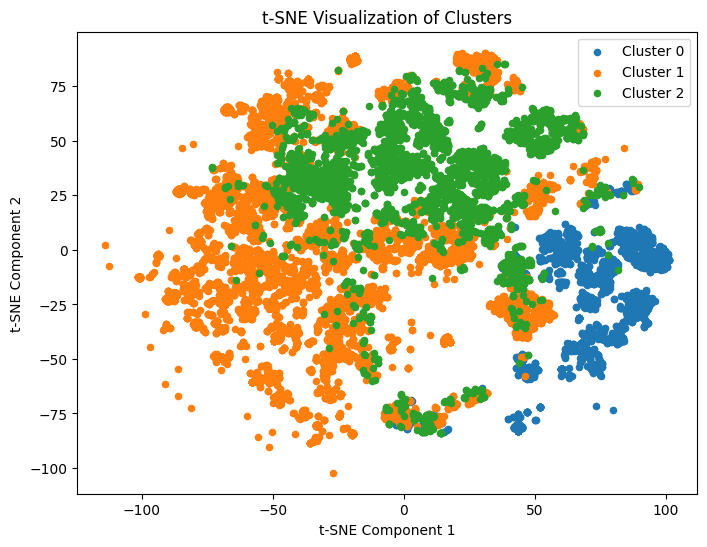

In [64]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np

# Assuming x_human and x_human_ad are already defined

# Perform K-means clustering
n_clusters = 3
if n_clusters <= y_human_ad.shape[0]:
    kmeans = KMeans(n_clusters=n_clusters, init=y_human_ad[:n_clusters], n_init=1, random_state=42)
else:
    init_centroids = np.tile(y_human_ad, (n_clusters // y_human_ad.shape[0], 1))
    if n_clusters % y_human_ad.shape[0] != 0:
        init_centroids = np.vstack([init_centroids, y_human_ad[:n_clusters % y_human_ad.shape[0]]])
    kmeans = KMeans(n_clusters=n_clusters, init=init_centroids, n_init=1, random_state=42)

# Perform clustering
clusters = kmeans.fit_predict(y_human)

# Perform t-SNE on the high-dimensional data (x_human) to reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(y_human)

# Plotting the t-SNE visualization with clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(x_tsne[clusters == i, 0], x_tsne[clusters == i, 1], label=f'Cluster {i}', s=20)

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


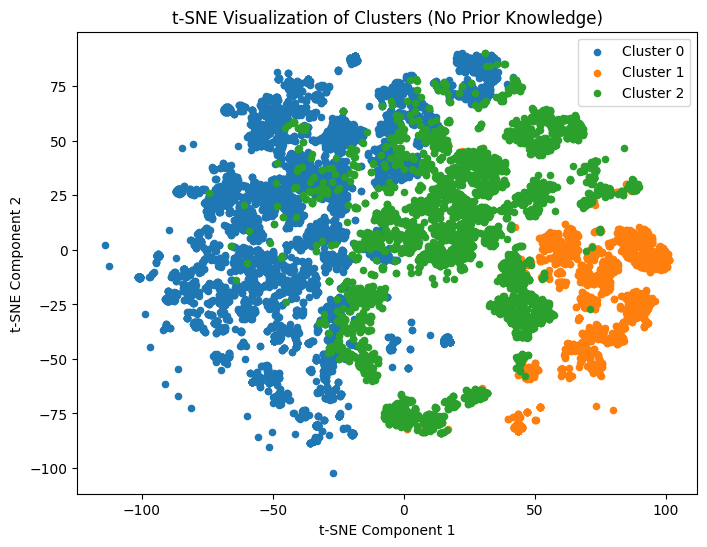

In [65]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np

# Assuming x_human is already defined

# Perform K-means clustering without prior knowledge of AD-related genes
n_clusters = 3  # Set the desired number of clusters

# Perform K-means clustering with random initialization
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Perform clustering
clusters = kmeans.fit_predict(y_human)

# Perform t-SNE on the high-dimensional data (x_human) to reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(y_human)

# Plotting the t-SNE visualization with clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(x_tsne[clusters == i, 0], x_tsne[clusters == i, 1], label=f'Cluster {i}', s=20)

plt.title('t-SNE Visualization of Clusters (No Prior Knowledge)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


## Models OGB

In [39]:
## https://github.com/snap-stanford/ogb/blob/master/examples/nodeproppred/proteins/logger.py
class Logger(object):
    def __init__(self, runs, info=None):
        self.info = info
        self.results = [[] for _ in range(runs)]

    def add_result(self, run, result):
        assert len(result) == 3
        assert run >= 0 and run < len(self.results)
        self.results[run].append(result)

    def print_statistics(self, run=None):
        if run is not None:
            result = 100 * torch.tensor(self.results[run])
            argmax = result[:, 1].argmax().item()
            print(f'Run {run + 1:02d}:')
            print(f'Highest Train: {result[:, 0].max():.2f}')
            print(f'Highest Valid: {result[:, 1].max():.2f}')
            print(f'  Final Train: {result[argmax, 0]:.2f}')
            print(f'   Final Test: {result[argmax, 2]:.2f}')
        else:
            result = 100 * torch.tensor(self.results)

            best_results = []
            for r in result:
                train1 = r[:, 0].max().item()
                valid = r[:, 1].max().item()
                train2 = r[r[:, 1].argmax(), 0].item()
                test = r[r[:, 1].argmax(), 2].item()
                best_results.append((train1, valid, train2, test))

            best_result = torch.tensor(best_results)

            print(f'All runs:')
            r = best_result[:, 0]
            print(f'Highest Train: {r.mean():.2f} ± {r.std():.2f}')
            r = best_result[:, 1]
            print(f'Highest Valid: {r.mean():.2f} ± {r.std():.2f}')
            r = best_result[:, 2]
            print(f'  Final Train: {r.mean():.2f} ± {r.std():.2f}')
            r = best_result[:, 3]
            print(f'   Final Test: {r.mean():.2f} ± {r.std():.2f}')

In [40]:
##
class MLP_node(torch.nn.Module):
    """
    This is the MLP framework we will use for ogbn-proteins
    """
    def __init__(
        self,
        in_channels,
        hidden_channels,
        out_channels,
        num_layers,
        dropout
    ):
        super(MLP_node, self).__init__()

        self.lins = torch.nn.ModuleList()
        self.lins.append(
            torch.nn.Linear(in_channels, hidden_channels)
        )
        for _ in range(num_layers - 2):
            self.lins.append(
                torch.nn.Linear(hidden_channels, hidden_channels)
            )
        self.lins.append(
            torch.nn.Linear(hidden_channels, out_channels)
        )
        self.dropout = dropout


    def reset_parameters(self):
        for lin in self.lins:
            lin.reset_parameters()


    def forward(self, x):
        for lin in self.lins[:-1]:
            x = lin(x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.lins[-1](x)
        return x


In [45]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch_geometric.utils import scatter

def main_node(args):
    """
    main script for ogbn-proteins.
    Adapt from examples:
        https://github.com/snap-stanford/ogb/blob/master/examples/nodeproppred/proteins/mlp.py
    """

    def train(model, x, y_true, train_idx, optimizer):
        model.train()
        criterion = torch.nn.BCEWithLogitsLoss()

        optimizer.zero_grad()
        out = model(x)[train_idx]
        loss = criterion(out, y_true[train_idx].to(torch.float))
        loss.backward()
        optimizer.step()

        return loss.item()


    @torch.no_grad()
    def test(model, x, y_true, split_idx, evaluator):
        model.eval()

        y_pred = model(x)

        train_rocauc = evaluator.eval({
            'y_true': y_true[split_idx['train']],
            'y_pred': y_pred[split_idx['train']],
        })['rocauc']
        valid_rocauc = evaluator.eval({
            'y_true': y_true[split_idx['valid']],
            'y_pred': y_pred[split_idx['valid']],
        })['rocauc']
        test_rocauc = evaluator.eval({
            'y_true': y_true[split_idx['test']],
            'y_pred': y_pred[split_idx['test']],
        })['rocauc']

        return train_rocauc, valid_rocauc, test_rocauc


    #
    device = f'cuda:{args.device}' if torch.cuda.is_available() else 'cpu'
    device = torch.device(device)

    # get dataset
    dataset = PygNodePropPredDataset(name='ogbn-proteins')
    print(dataset)
    split_idx = dataset.get_idx_split()
    data = dataset[0]

    # input
    x = scatter(data.edge_attr, data.edge_index[0], dim=0,
                dim_size=data.num_nodes, reduce='mean').to('cpu')
    print(x.shape) # this is torch.Size([132534, 8])

    binary_vector = np.zeros(x.shape[0])
    # Set the values at the prioritized indices to 1
    binary_vector[node_idx_prioritized] = 1
    binary_vector_tensor = torch.tensor(binary_vector, dtype=torch.float).unsqueeze(-1)

    x = torch.cat([x, binary_vector_tensor], dim=-1) # we expect: torch.Size([132534, 9])
    print(x.shape)
    sds



    # input & node embedding
    if args.use_node_embedding:
        embedding = torch.load('embedding.pt', map_location='cpu')
        x = torch.cat([x, embedding], dim=-1)
    x = x.to(device)

    # label
    y_true = data.y.to(device)
    # splitting
    train_idx = split_idx['train'].to(device)

    ## models
    model = MLP_node(
        x.size(-1),
        args.hidden_channels,
        112,
        args.num_layers,
        args.dropout
    ).to(device)

    # get evaluator
    evaluator = ogb.nodeproppred.Evaluator(
        name='ogbn-proteins'
    )
    # get logger
    logger = Logger(args.runs, args)

    for run in range(args.runs):
        model.reset_parameters()
        optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
        for epoch in range(1, 1 + args.epochs):
            loss = train(model, x, y_true, train_idx, optimizer)

            if epoch % args.eval_steps == 0:
                result = test(model, x, y_true, split_idx, evaluator)
                logger.add_result(run, result)

                if epoch % args.log_steps == 0:
                    train_rocauc, valid_rocauc, test_rocauc = result
                    print(f'Run: {run + 1:02d}, '
                          f'Epoch: {epoch:02d}, '
                          f'Loss: {loss:.4f}, '
                          f'Train: {100 * train_rocauc:.2f}%, '
                          f'Valid: {100 * valid_rocauc:.2f}% '
                          f'Test: {100 * test_rocauc:.2f}%')

        logger.print_statistics(run)
    logger.print_statistics()

In [ ]:
class ARGS_NODE:
    device:int = 0
    log_steps:int = 1
    use_node_embedding:bool = False
    num_layers:int = 3
    hidden_channels:int = 256
    dropout:float = 0.5
    lr:float = 0.01
    epochs:int = 100
    eval_steps:int = 5
    runs:int = 10

main_node(args=ARGS_NODE)

/usr/local/lib/python3.11/dist-packages/ogb/nodeproppred/dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.load(self.processed_

## MODELS OGBL-PPA

In [ ]:
class MLP_link(torch.nn.Module):
    """
    This is the MLP framework we will use for ogbl-ppa
    """
    def __init__(
        self,
        in_channels,
        hidden_channels,
        out_channels,
        num_layers,
        dropout
    ):
        super(MLP_link, self).__init__()

        self.lins = torch.nn.ModuleList()
        self.lins.append(
            torch.nn.Linear(in_channels, hidden_channels)
        )
        for _ in range(num_layers - 2):
            self.lins.append(
                torch.nn.Linear(hidden_channels, hidden_channels)
            )
        self.lins.append(
            torch.nn.Linear(hidden_channels, out_channels)
        )
        self.dropout = dropout

    def reset_parameters(self):
        for lin in self.lins:
            lin.reset_parameters()

    def forward(self, x_i, x_j): # here different.
        x = x_i * x_j
        for lin in self.lins[:-1]:
            x = lin(x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.lins[-1](x)
        return torch.sigmoid(x)

### TEXT MINING

In [ ]:
!pip install biopython pyspark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 26.5 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez, Medline


Entrez.email = 'your_email@example.com'


def fetch_papers(query:str, retmax:int):
    """Fetches paper titles related to a disease from PubMed."""

    handle = Entrez.esearch(db="pubmed", term=query, retmax=retmax, sort='relevance', retmode='text')
    record = Entrez.read(handle)
    # handle.close()

    # Fetch the details of the papers
    ids = record['IdList']
    handle = Entrez.efetch(
        db="pubmed",
        # id=','.join(ids),
        id=ids,
        retmode="text",
        # rettype="abstract",
        rettype="medline",
    )
    # records = handle.read().split("\n")
    # handle.close()

    records = Medline.parse(handle)

    return records

# titles = []
# disease_name = 'Alzheimer'
# for record in fetch_papers(disease_name):
#     title = record.get('TI','')
#     # abstract = record.get('AB','')
#     # titles_abstracts.append(title+abstract)
#     titles.append(title)

# print(titles)

In [ ]:
import sys

def retrieve_annotation(id_list):

    """Annotates Entrez Gene IDs using Bio.Entrez, in particular epost (to
    submit the data to NCBI) and esummary to retrieve the information.
    Returns a list of dictionaries with the annotations."""

    request = Entrez.epost("gene", id=",".join(id_list))
    try:
        result = Entrez.read(request)
    except RuntimeError as e:
        # FIXME: How generate NAs instead of causing an error with invalid IDs?
        print("An error occurred while retrieving the annotations.")
        # print("The error returned was %s".format(e))
        sys.exit(-1)

    webEnv = result["WebEnv"]
    queryKey = result["QueryKey"]
    data = Entrez.esummary(db="gene", webenv=webEnv, query_key=queryKey)
    annotations = Entrez.read(data)

    # print("Retrieved %d annotations for %d genes".format(len(annotations), len(id_list))

    return annotations


annotations = retrieve_annotation(['7157'])
annotations['DocumentSummarySet']

DictElement({'DocumentSummary': [DictElement({'Name': 'TP53', 'Description': 'tumor protein p53', 'Status': '0', 'CurrentID': '0', 'Chromosome': '17', 'GeneticSource': 'genomic', 'MapLocation': '17p13.1', 'OtherAliases': 'BCC7, BMFS5, LFS1, P53, TRP53', 'OtherDesignations': 'cellular tumor antigen p53|antigen NY-CO-13|mutant tumor protein 53|phosphoprotein p53|transformation-related protein 53|tumor protein 53|tumor supressor p53', 'NomenclatureSymbol': 'TP53', 'NomenclatureName': 'tumor protein p53', 'NomenclatureStatus': 'Official', 'Mim': ['191170'], 'GenomicInfo': [{'ChrLoc': '17', 'ChrAccVer': 'NC_000017.11', 'ChrStart': '7687489', 'ChrStop': '7668420', 'ExonCount': '13'}], 'GeneWeight': '798053', 'Summary': 'This gene encodes a tumor suppressor protein containing transcriptional activation, DNA binding, and oligomerization domains. The encoded protein responds to diverse cellular stresses to regulate expression of target genes, thereby inducing cell cycle arrest, apoptosis, senes

In [ ]:
def search_genes(id_list,search_field):
    """Use ESearch to convert RefSeq or Gene symbols to standard
    Entrez IDs.

    A request to esearch.cgi is like:
    http://www.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=gene&term=ID_LIST[SEARCH_FIELD]

    Return a list of Entrez IDs.
    """
    term = " OR ".join(map(lambda x:x+"["+search_field+"]",id_list))
    esearch_result = Entrez.esearch(db="gene",term=term,retmod="xml")
    parsed_result = Entrez.read(esearch_result)
    return parsed_result['IdList']

def fetch_genes(id_list):
    """Fetch Entrez Gene records using Bio.Entrez, in particular epost
    (to submit the data to NCBI) and efetch to retrieve the
    information, then use Entrez.read to parse the data.

    Returns a list of parsed gene records.
    """

    request = Entrez.epost("gene",id=",".join(id_list))
    try:
        result = Entrez.read(request)
    except RuntimeError as e:
        #FIXME: How generate NAs instead of causing an error with invalid IDs?
        sys.exit(-1)

    webEnv = result["WebEnv"]
    queryKey = result["QueryKey"]
    efetch_result = Entrez.efetch(db="gene", webenv=webEnv, query_key = queryKey, retmode="xml")
    genes = Entrez.read(efetch_result)
    #print "Retrieved %d records for %d genes" % (len(genes),len(id_list))
    return genes

def parse_genes(genes):
    """Parse various gene information including:

    1. Species name (taxonomy name)
    2. Entrez gene ID
    3. Official symbol
    4. RefSeq IDs
    5. Offical full name

    Basically, just to go through the parsed xml data.... A big headache to figure it out...

    Return a list of dictionary.
    """
    gene_info_list = []
    for gene_data in genes:
        gene_info = {}
        # get entrez ID
        try:
            gene_info["entrez_id"] = gene_data["Entrezgene_track-info"]["Gene-track"]["Gene-track_geneid"]
        except KeyError:
            gene_info["entrez_id"] = ""
            continue
        gene_info["refseq_ids"] = []
        for comment in gene_data.get("Entrezgene_comments",[]):
            # look for refSeq annotation
            if comment.get("Gene-commentary_heading",None) == "NCBI Reference Sequences (RefSeq)":
                # get sub-comments
                for subcomment in comment.get("Gene-commentary_comment",[]):
                    for product in subcomment.get("Gene-commentary_products",[]):
                        if product.get("Gene-commentary_heading",None) == "mRNA Sequence":
                            gene_info["refseq_ids"].append(product.get("Gene-commentary_accession",""))
        # get properties
        gene_info["official_symbol"] = "" # optional
        gene_info["official_full_name"] = "" # optional
        for gene_property in gene_data.get("Entrezgene_properties",[]):
            if gene_property.get("Gene-commentary_label",None) == "Nomenclature":
                for sub_property in gene_property["Gene-commentary_properties"]:
                    if sub_property.get("Gene-commentary_label",None)  == "Official Symbol":
                        gene_info["official_symbol"] = sub_property.get("Gene-commentary_text","")
                    if sub_property.get("Gene-commentary_label",None)  == "Official Full Name":
                        gene_info["official_full_name"] = sub_property.get("Gene-commentary_text","")

        # get taxname
        try:
            gene_info["taxname"] = gene_data["Entrezgene_source"]["BioSource"]["BioSource_org"]["Org-ref"]["Org-ref_taxname"]
        except KeyError:
            gene_info["taxname"] = ""
            continue
        gene_info_list.append(gene_info)

    return gene_info_list

###
input_id_list = ['ARF5', 'M6PR']
entrez_id_list = search_genes(input_id_list,"GENE")
entrez_id_genes = fetch_genes(entrez_id_list)
parsed_genes = parse_genes(entrez_id_genes)
print(parsed_genes)

[{'entrez_id': '139205698', 'refseq_ids': [], 'official_symbol': '', 'official_full_name': '', 'taxname': 'Pempheris klunzingeri'}, {'entrez_id': '139161964', 'refseq_ids': [], 'official_symbol': '', 'official_full_name': '', 'taxname': 'Erythrolamprus reginae'}, {'entrez_id': '16002', 'refseq_ids': ['NM_001122736', 'NM_001122737', 'NM_001315488', 'NM_001315489', 'NM_010514'], 'official_symbol': '', 'official_full_name': '', 'taxname': 'Mus musculus'}, {'entrez_id': '3482', 'refseq_ids': ['NM_000876'], 'official_symbol': '', 'official_full_name': '', 'taxname': 'Homo sapiens'}, {'entrez_id': '4074', 'refseq_ids': ['NM_001207024', 'NM_001414320', 'NM_001414322', 'NM_001414323', 'NM_001414324', 'NM_001414325', 'NM_001414327', 'NM_001414328', 'NM_001414329', 'NM_001414330', 'NM_001414331', 'NM_001414332', 'NM_001414333', 'NM_002355'], 'official_symbol': '', 'official_full_name': '', 'taxname': 'Homo sapiens'}, {'entrez_id': '838573', 'refseq_ids': [], 'official_symbol': '', 'official_full

In [ ]:
gene_list = df_info['preferred_name'].to_list()
# gene_list

In [ ]:
# # Initialize Spark
# spark = SparkSession.builder \
#     .appName("Gene Text Mining without Predefined List") \
#     .getOrCreate()

# User input: disease name
query = "alzheimers AND gene"

# Fetch relevant papers
records = fetch_papers(query, 200)

# Extract titles
paper_titles = [record.get('TI','') for record in records]
print(paper_titles)


from pyspark import SparkContext

sc = SparkContext("local", "Frequent Items")

# Parallelize the list to create an RDD
titles_rdd = sc.parallelize(paper_titles)

# Map step: Split the titles into words and pair each word with a count of 1
words_rdd = titles_rdd.flatMap(lambda title: title.split(" ")).map(lambda word: (word.lower(), 1))

# Reduce step: Count the occurrences of each word
word_counts_rdd = words_rdd.reduceByKey(lambda x, y: x + y)

# Collect the result and sort by frequency
sorted_word_counts = word_counts_rdd.collect()
sorted_word_counts = sorted(sorted_word_counts, key=lambda x: x[1], reverse=True)

# Print the most frequent words and their counts
for word, count in sorted_word_counts:
    print(f"{word}: {count}")


# Stop Spark
# spark.stop()


["ApoE in Alzheimer's disease: pathophysiology and therapeutic strategies.", "Gene dose of apolipoprotein E type 4 allele and the risk of Alzheimer's disease in late onset families.", "Clinical and biomarker changes in dominantly inherited Alzheimer's disease.", "Epigenetic dysregulation in Alzheimer's disease peripheral immunity.", "Identification of immune microenvironment subtypes and signature genes for Alzheimer's disease diagnosis and risk prediction based on explainable machine learning.", 'Enhancer-driven gene regulatory networks inference from single-cell RNA-seq and ATAC-seq data.', "APOE3 Christchurch Heterozygosity and Autosomal Dominant Alzheimer's Disease.", "Cognitively healthy centenarians are genetically protected against Alzheimer's disease.", "SHMT2 Mediates Small-Molecule-Induced Alleviation of Alzheimer Pathology Via the 5'UTR-dependent ADAM10 Translation Initiation.", "Relationship between the FAS gene A-670G polymorphism and Alzheimer's disease: a meta-analysis."